In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-03-12 17:03:56.421893: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 17:03:57.175475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
''' Data Augmentatioon'''
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

''' flow from directory '''
train_ds = train_ds.flow_from_directory('./cat vs dog/training_set/training_set', target_size=(64, 64), 
                                        batch_size=32, class_mode='binary')

Found 8005 images belonging to 2 classes.


In [3]:
''' Scaling '''
test_ds = ImageDataGenerator(rescale = 1./255)

''' flow from directory '''
test_ds = test_ds.flow_from_directory('./cat vs dog/test_set', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')

Found 2023 images belonging to 1 classes.


In [4]:
''' container '''
model = tf.keras.models.Sequential()

''' addding layers to convtainer '''
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

''' adding max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

''' 2nd convolutional layer '''
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))

''' 2nd max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

''' flattening '''
model.add(tf.keras.layers.Flatten())

''' Hidden Layer '''
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

''' classification layer '''
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/home/mohamed/Desktop/Projects/Mini-Projects-Python/Machine Learning/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-12 17:03:58.226501: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-12 17:03:58.272799: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and

In [5]:
''' compile the model '''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
''' lets see what the model looks like '''
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
''' training '''
model.fit(x=train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25


/home/mohamed/Desktop/Projects/Mini-Projects-Python/Machine Learning/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.5331 - loss: 0.6978 - val_accuracy: 0.3742 - val_loss: 0.9148
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.6665 - loss: 0.6171 - val_accuracy: 0.6372 - val_loss: 0.7013
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.6970 - loss: 0.5754 - val_accuracy: 0.3440 - val_loss: 1.2227
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7221 - loss: 0.5478 - val_accuracy: 0.2887 - val_loss: 1.4813
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7292 - loss: 0.5283 - val_accuracy: 0.4132 - val_loss: 1.2092
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7326 - loss: 0.5179 - val_accuracy: 0.4202 - val_loss: 1.3600
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7627 - loss: 0.4882 - val_accuracy: 0.4093 - val_loss: 1.4587
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7727 - loss: 0.4720 - val_accurac

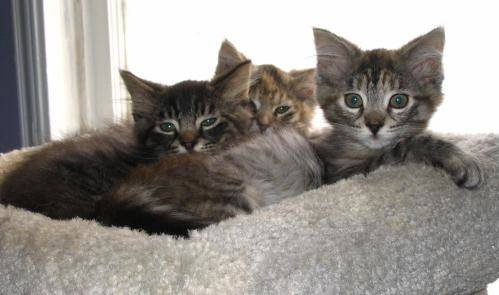

In [8]:
''' plotting cat image '''
image.load_img('./cat vs dog/training_set/training_set/cats/cat.1441.jpg')

In [11]:
''' prediction '''
test_img = image.load_img('./cat vs dog/training_set/training_set/cats/cat.1441.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis=0)

''' prediction '''
r = model.predict(img)
train_ds.class_indices

if r[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [12]:
print(pred)

cat


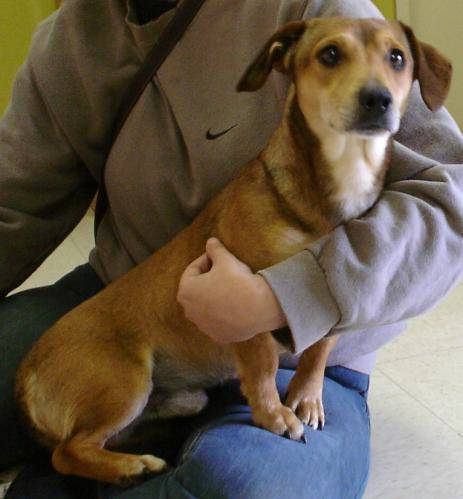

In [13]:
''' plotting dog image '''
image.load_img('./cat vs dog/training_set/training_set/dogs/dog.1280.jpg')

In [14]:
''' prediction '''
test_img = image.load_img('./cat vs dog/training_set/training_set/dogs/dog.1280.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis = 0)

''' prediction '''
r = model.predict(img)

train_ds.class_indices

if r[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [15]:
print(pred)

dog
